#Laboratório 4: Visualização de Dados com

Q1. Importe o conjunto de dados diamonds, cujo arquivo está disponível no website da disciplina.

Q2. Crie uma visualização de dados que descreva a associação existente entre as variáveis peso (carat) e preço (price). Que ações você tomou para garantir que você produziu um gráfico de boa qualidade? Escreva um parágrafo comunicando os seus achados.

Q3. A relação identificada na questão anterior é a mesma relação presente nos diferentes cortes de diamantes? Crie uma visualização que demonstre seus achados eficientemente. Descreva sua conclusão em um parágrafo.

Q4. Crie uma visualização que mostre a relação entre preço e peso do diamante, considerando as diferentes combinações de qualidade de corte, cor e clareza do diamante. Quais foram as dificuldades encontradas? A relação entre preço e peso é a mesma para diferentes configurações de diamantes?

Q1

In [30]:
# Importa a biblioteca plotnine
from plotnine import *

# Importa a biblioteca pandas
import pandas as pd

# Importa o conjunto de dados 'diamonds'
from plotnine.data import diamonds


Q2

Para melhorar o gráfico usei o alpha=0.5, o que ajuda a revelar a densidade dos dados; adicionei a linha de tendência(geom_smooth), que ajuda a resumir a tendência central.
Tendo em vista o gráfico, vemos uma associação positiva entre peso e preço, no entando, há uma alta variabilidade de preços para um mesmo peso.

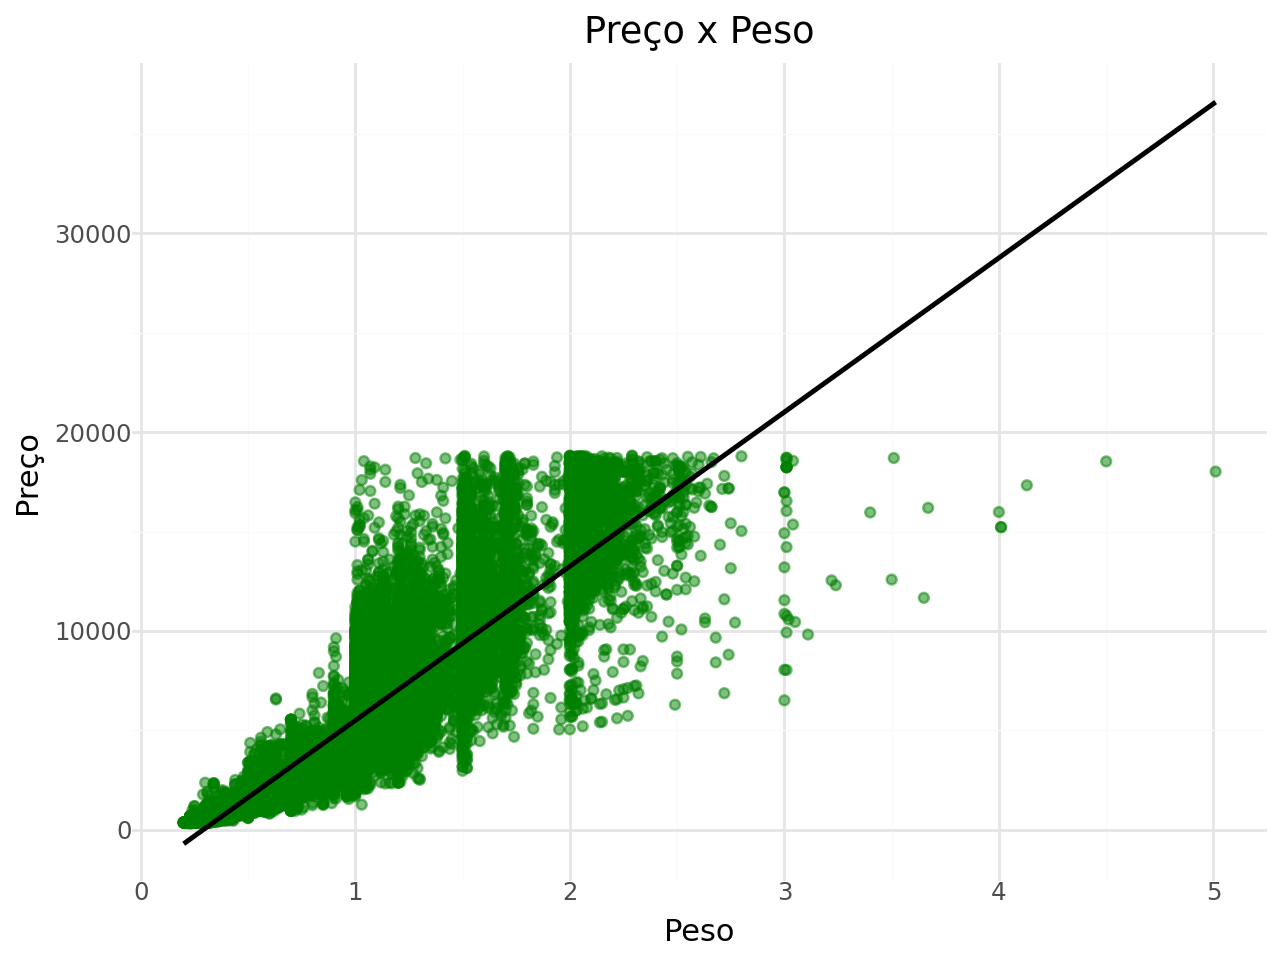

In [31]:
ggplot(diamonds, aes(x='carat', y='price')) + geom_point(alpha=0.5, color = "green") + geom_smooth(method='lm') + theme_minimal()+ labs(title = "Preço x Peso", x = "Peso", y = "Preço")

Q3

Podemos ver que a relação obtida na questão anterior se mantém como esperado. No entanto podemos notar que a linha de tendência é mais ingreme nas categorias Fair e Good, o que pode indicar que em alguns casos, o preço pode superar a qualidade do corte. Notamos também que a alta variabilidade de preços para um mesmo peso se mantém pelas categorias, principalmente entre as melhores(Premium e Ideal)

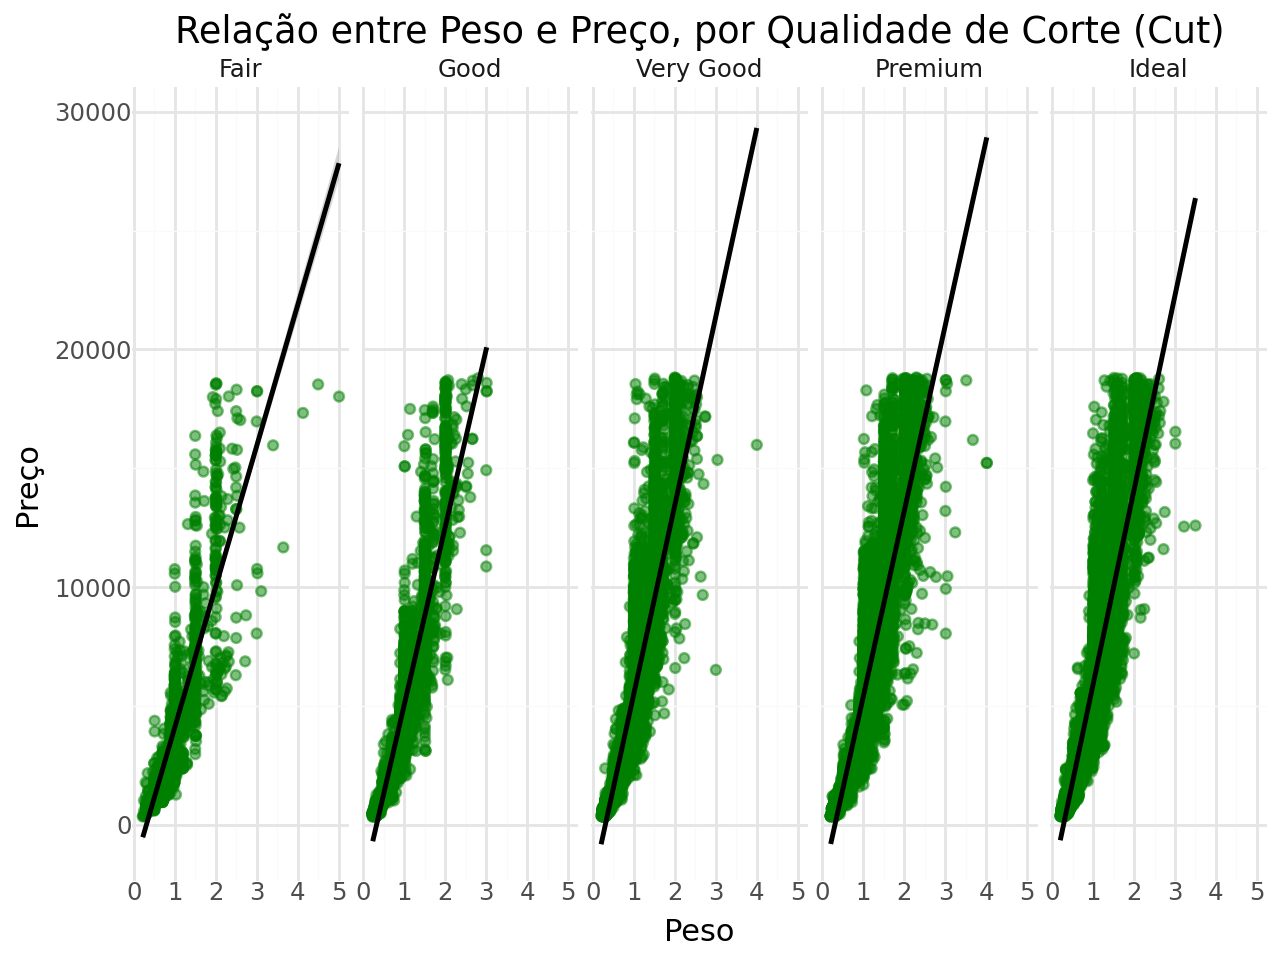

In [32]:
(
    ggplot(diamonds, aes(x='carat', y='price'))
    + geom_point(alpha=0.5, color = "green")
    + geom_smooth(method='lm')
    + theme_minimal()
    #Divide o gráfico em painéis separados para cada categoria de 'cut'
    + facet_wrap('~ cut', nrow=1)
    + labs(title='Relação entre Peso e Preço, por Qualidade de Corte (Cut)', x='Peso', y='Preço')
)

Q4

A maior dificuldade foi visualizar as variáveis por conta da alta sobreposição entre elas. Porém, ainda sim é possível notar que a relação entre preço e peso se mantém a mesma(quanto maior o peso, maior o preço). Também é possível notar que a concentração das variáveis vai subindo de posição no gráico a medida que melhoramos a qualidade dos diamantes.

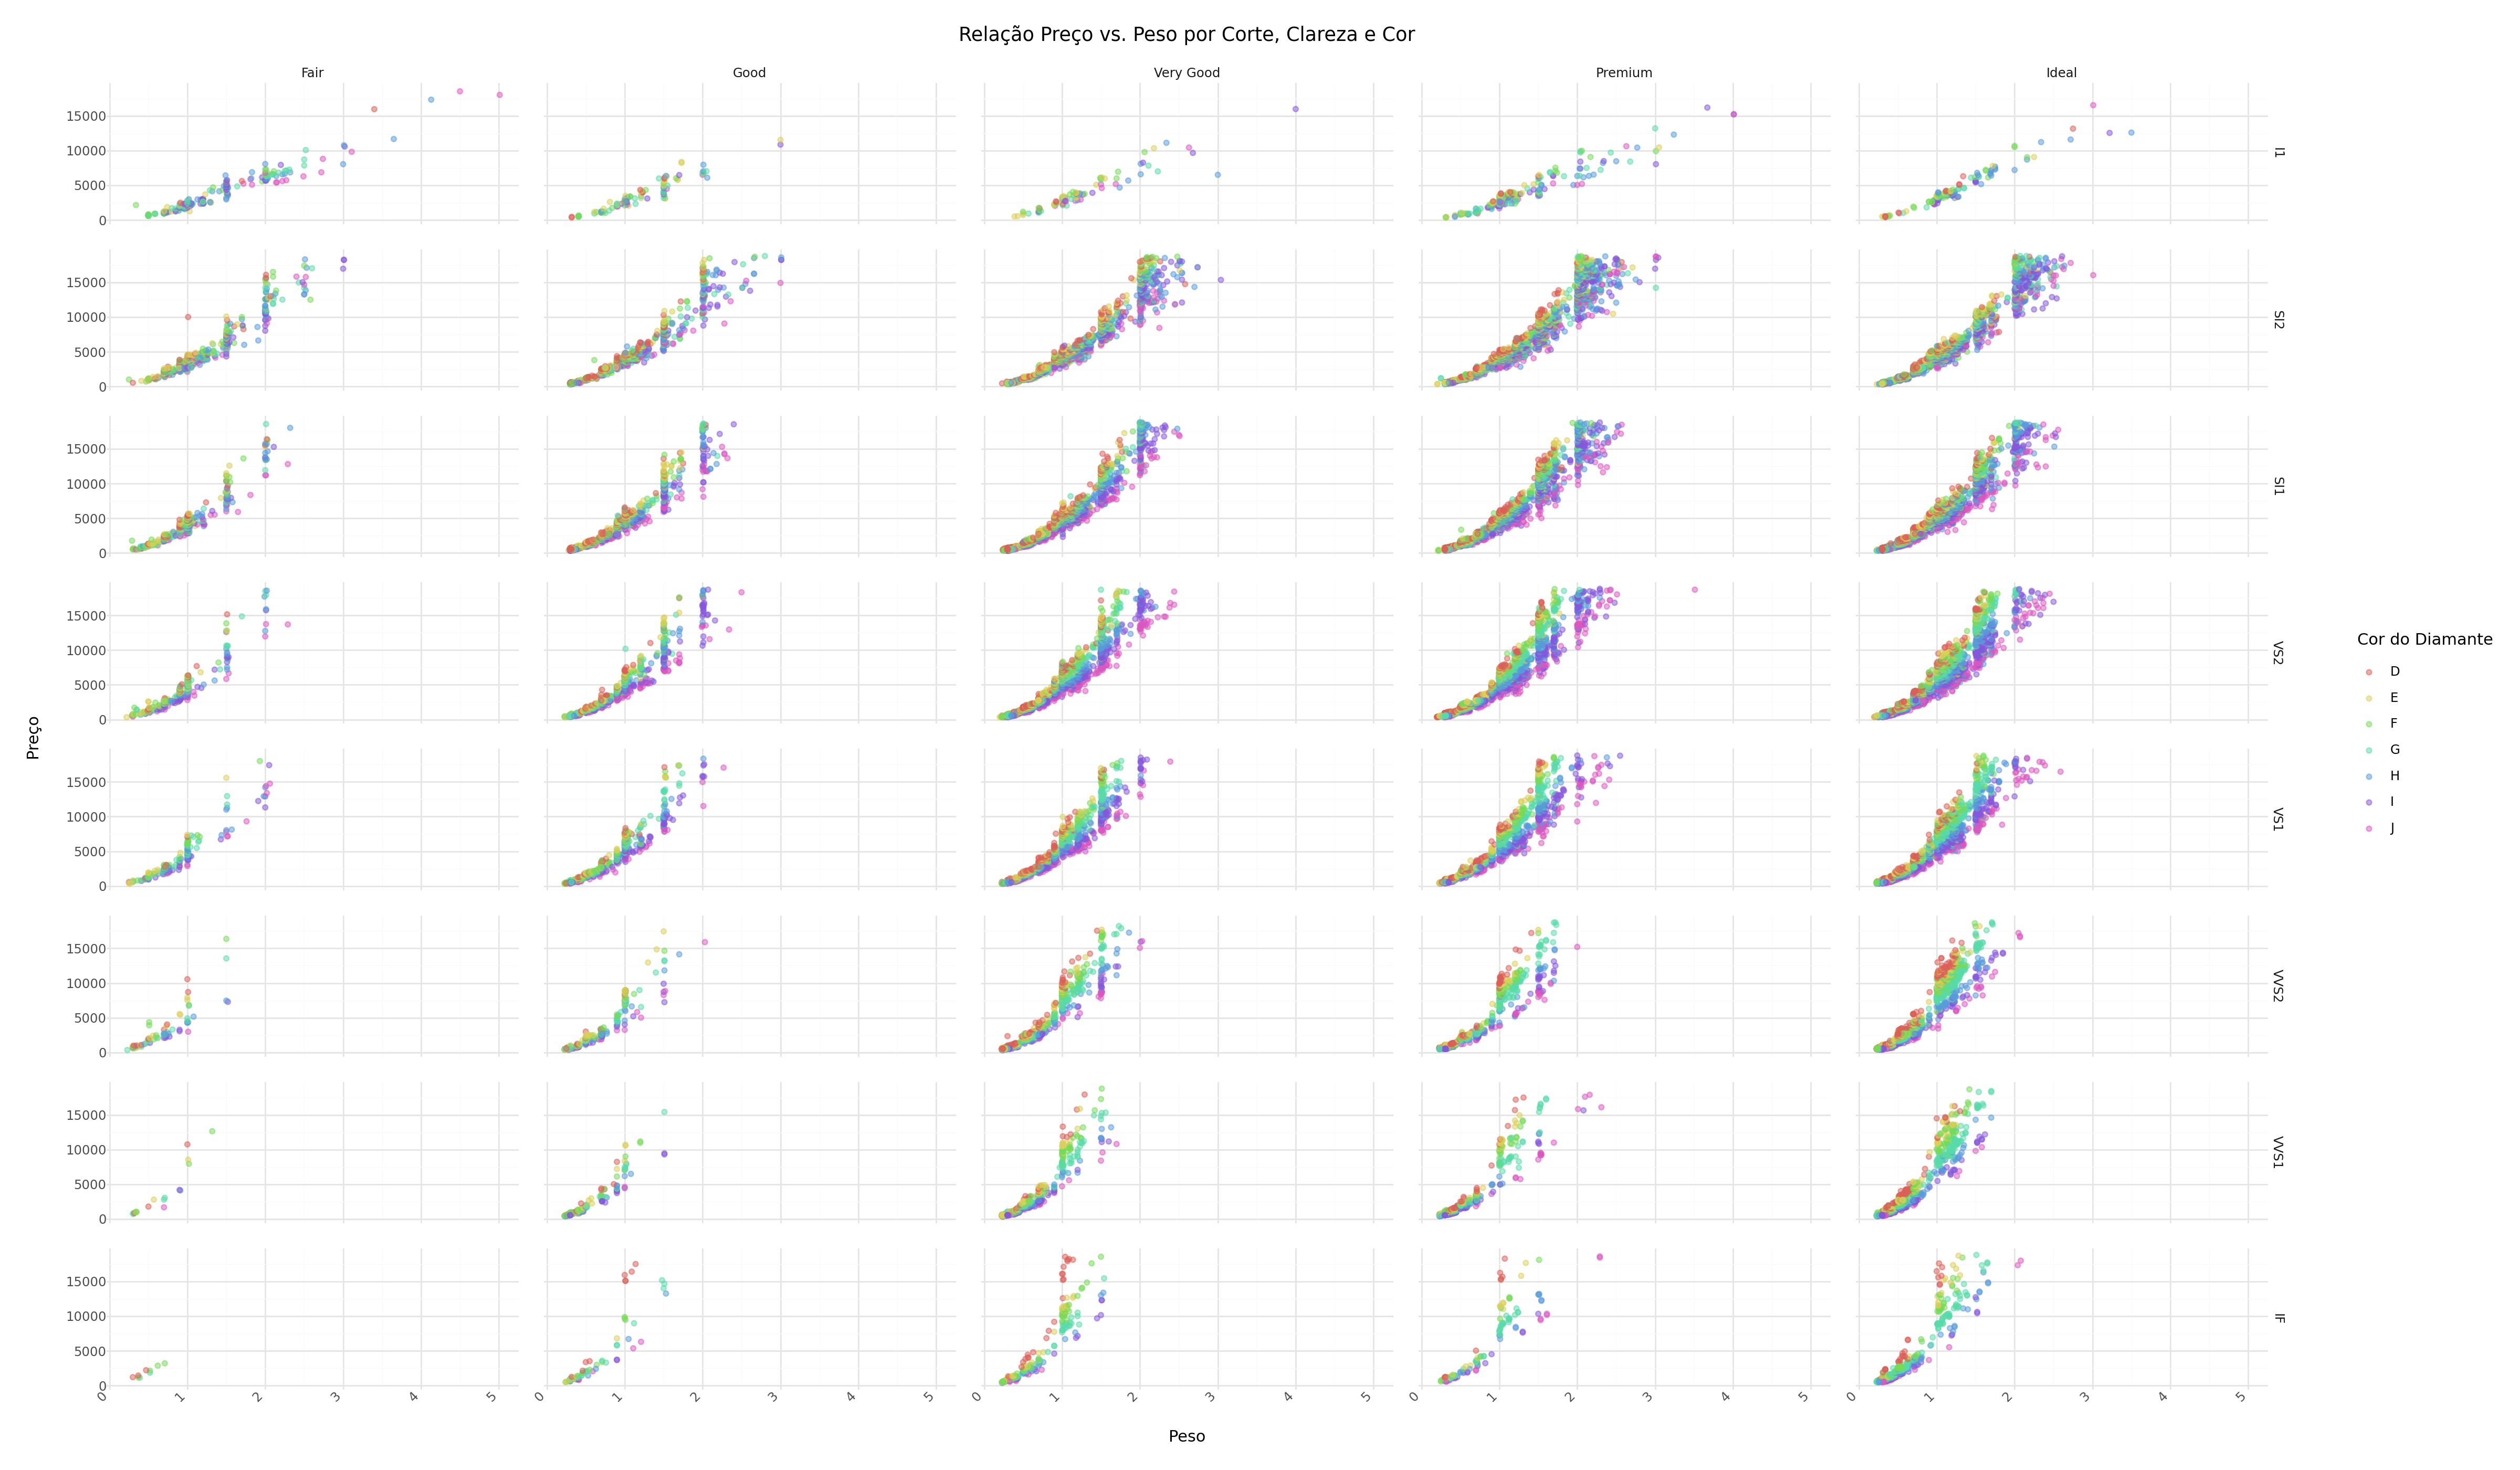

In [33]:
cut_cats = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
clarity_cats = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=cut_cats, ordered=True)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=clarity_cats, ordered=True)

(
    ggplot(diamonds, aes(x='carat', y='price', color='color'))
    + geom_point(alpha=0.5)
    #'clarity' nas linhas- 'cut' nas colunas
    + facet_grid('clarity ~ cut')
    + labs(title='Relação Preço vs. Peso por Corte, Clareza e Cor',x='Peso', y='Preço')
    #legenda de cores
    + scale_color_discrete(name="Cor do Diamante")
    # 5. Otimiza o tema
    + theme(axis_text_x=element_text(angle=45, hjust=1), figure_size=(24, 14))
)